#### In this notebook, we aim to build a machine learning model that predicts calorie expenditure based on physiological and workout data.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Loading Data

In [11]:
train = pd.read_csv('/kaggle/input/playground-series-s5e5/train.csv')
test = pd.read_csv('/kaggle/input/playground-series-s5e5/test.csv')
train.head()

,id,Sex,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,0,male,36,189.0,82.0,26.0,101.0,41.0,150.0
1,1,female,64,163.0,60.0,8.0,85.0,39.7,34.0
2,2,female,51,161.0,64.0,7.0,84.0,39.8,29.0
3,3,male,20,192.0,90.0,25.0,105.0,40.7,140.0
4,4,female,38,166.0,61.0,25.0,102.0,40.6,146.0


In [13]:
test.shape

(250000, 8)

# Inspecting Data

In [15]:
train.shape

(750000, 9)

In [17]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750000 entries, 0 to 749999
Data columns (total 15 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   id                 750000 non-null  int64  
 1   Sex                750000 non-null  int64  
 2   Age                750000 non-null  int64  
 3   Height             750000 non-null  float64
 4   Weight             750000 non-null  float64
 5   Duration           750000 non-null  float64
 6   Heart_Rate         750000 non-null  float64
 7   Body_Temp          750000 non-null  float64
 8   Calories           750000 non-null  float64
 9   BMI                750000 non-null  float64
 10  HR_per_min         750000 non-null  float64
 11  Temp_per_min       750000 non-null  float64
 12  Effort             750000 non-null  float64
 13  Age_Weight         750000 non-null  float64
 14  Weight_per_height  750000 non-null  float64
dtypes: float64(12), int64(3)
memory usage: 85.8 MB


In [19]:
train.describe()

,id,Sex,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories,BMI,HR_per_min,Temp_per_min,Effort,Age_Weight,Weight_per_height
count,750000.000000,750000.000000,750000.000000,750000.000000,750000.000000,750000.000000,750000.000000,750000.000000,750000.000000,750000.000000,750000.000000,750000.000000,750000.000000,750000.000000,750000.000000
mean,374999.500000,0.500961,41.420404,174.697685,75.145668,15.421015,95.483995,40.036253,88.282781,24.374817,10.547400,4.673207,62356.313368,3128.200032,0.426835
std,216506.495284,0.499999,15.175049,12.824496,13.982704,8.354095,9.449845,0.779875,62.395349,1.511310,12.237710,5.763544,38292.638277,1334.431304,0.050408
min,0.000000,0.000000,20.000000,126.000000,36.000000,1.000000,67.000000,37.100000,1.000000,12.375937,2.714286,1.283333,2485.700000,860.000000,0.220859
25%,187499.750000,0.000000,28.000000,164.000000,63.000000,8.000000,88.000000,39.600000,34.000000,23.255019,4.521739,1.773913,28828.800000,2046.000000,0.384181
50%,374999.500000,1.000000,40.000000,174.000000,74.000000,15.000000,95.000000,40.300000,77.000000,24.391059,6.214286,2.673333,58320.000000,2912.000000,0.423913
75%,562499.250000,1.000000,52.000000,185.000000,87.000000,23.000000,103.000000,40.700000,136.000000,25.487697,10.750000,4.937500,94546.100000,3978.000000,0.469274
max,749999.000000,1.000000,79.000000,222.000000,132.000000,30.000000,128.000000,41.500000,314.000000,46.443986,108.000000,39.000000,157440.000000,9401.000000,0.678082


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Calories', ylabel='Count'>

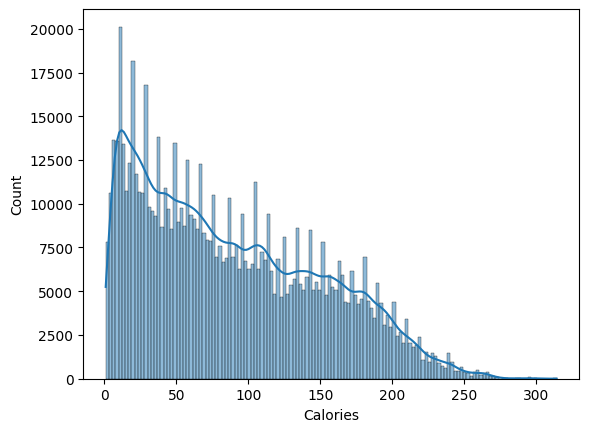

In [21]:
sns.histplot(train['Calories'], kde=True)

## Data Cleaning and Preprocessing

Null values

In [23]:
train.isnull().sum()

id                   0
Sex                  0
Age                  0
Height               0
Weight               0
Duration             0
Heart_Rate           0
Body_Temp            0
Calories             0
BMI                  0
HR_per_min           0
Temp_per_min         0
Effort               0
Age_Weight           0
Weight_per_height    0
dtype: int64

In [45]:
train.dropna(axis=0,inplace=True)

### Encoding Columns

In [27]:
train['Sex'] = train['Sex'].map({'male': 0, 'female': 1})
test['Sex'] = test['Sex'].map({'male': 0, 'female': 1})

In [31]:
train['Sex'].dtype

dtype('float64')

# Feature Engineering

In [36]:
for df in [train, test]:
    df['BMI'] = df['Weight'] / (df['Height'] / 100) ** 2
    df['HR_per_min'] = df['Heart_Rate'] / df['Duration']
    df['Temp_per_min'] = df['Body_Temp'] / df['Duration']
    df['Effort'] = df['Heart_Rate'] * df['Body_Temp'] * df['Duration']
    df['Age_Weight'] = df['Age'] * df['Weight']
    df['Weight_per_height'] = df['Weight'] / df['Height']

In [37]:
features = [
    'Sex', 'Age', 'Height', 'Weight', 'Duration', 'Heart_Rate', 'Body_Temp',
    'BMI', 'HR_per_min', 'Temp_per_min', 'Effort',
    'Age_Weight', 'Weight_per_height'
]

X = train[features]
y = np.log1p(train["Calories"])  # Target in log scale
X_test = test[features]

Preprocessor creation

In [48]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_log_error

In [39]:
numeric_features = [col for col in features if col != 'Sex']
preprocessor = ColumnTransformer([
    ('num', StandardScaler(), numeric_features)
], remainder='passthrough')

# Model Training

In [100]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)

In [102]:
X_train_preprocessed = preprocessor.fit_transform(X_train)
X_valid_preprocessed = preprocessor.transform(X_valid)

In [103]:
xgb_params = {
    'objective': 'reg:squaredlogerror',  # For RMSLE optimization
    'learning_rate': 0.02,
    'max_depth': 8,
    'colsample_bytree': 0.7,
    'eval_metric': 'rmsle'
}

model = xgb.XGBRegressor(
    **xgb_params,
    n_estimators=1000,         
    n_jobs=-1
)
model.fit(X_train_preprocessed, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.7, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric='rmsle', feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.02, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=8, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=1000, n_jobs=-1,
             num_parallel_tree=None, objective='reg:squaredlogerror', ...)

# Testing on validation data

In [104]:
y_pred = model.predict(X_valid_preprocessed)
rmsle = np.sqrt(mean_squared_log_error(y_valid, y_pred))
print(f'Validation RMSLE: {rmsle:.4f}')

Validation RMSLE: 0.0193
